## Questions
1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

4) What is the gradient of the following function with respect to x and y?<br>
    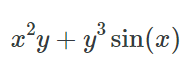

   
6) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

7) Use sympy to confirm that you obtain the same gradient analytically.

8) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2


8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

9) Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

    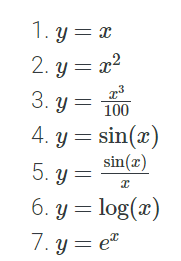

10) Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

11) Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

12) Write a small piece of code to explain broadcasting in numpy.

13) Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

## Solutions

In [1]:
# Dependencies
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

### Question 1

To multiply a (n, k) matrix by a (k, m) matrix, we ewill need a total of ```n * m * k``` multiplications and ```n * m * (k-1)``` number of addition operations, <br>
The first matrix has n rows and each row has k entries, the second matrix has k rows with each row having m entries, <br>
so when we try to multiply the first row of the first matrix, we will have to multiply (k, k) elements to each other and then add them.<br>
We will have to repeat this for all m columns of the second matrix for each of the  n rows in the first matrix 

### Question 2

In [2]:
# Increase the dimensions of metrix to get noticable difference in time
n = 10
k = 50
m = 60

# Initializing arrays from a random distribution
arr1 = np.random.rand(n, k)
arr2 = np.random.rand(k, m)

l1 = [list(i) for i in list(arr1)]
l2 = [list(i) for i in list(arr2)]

# print(l1)
# print(l2)

In [3]:
# Vanilla Python solution

# product is going to be a (n, m) matrix
a = [0] * m
p = [a for i in range(n)]
# p

start_time_list = time.perf_counter_ns()

for i in range(n):
    for j in range(m):
        curr_sum = 0
        for x in range(k):
            curr_sum += l1[i][x] * l2[x][j]
        p[i][j] = curr_sum

end_time_list = time.perf_counter_ns()

# print(p)

In [4]:
# Numpy solution

# print("arr1 = ", arr1)
# print(arr1.shape)

# print("arr2 = ", arr2)
# print(arr2.shape)
start_time = time.perf_counter_ns()
arr1xarr2 = np.matmul(arr1, arr2)
end_time = time.perf_counter_ns()
# arr1xarr2

In [5]:
print(f'Time taken by list method: {end_time_list - start_time_list} ns')
print(f'Time taken by using numpy: {end_time - start_time} ns')

Time taken by list method: 8179200 ns
Time taken by using numpy: 5607400 ns


We can observe a difference in the times taken by different methods. This difference is because Numpy uses __Vectorization__ to perform calculations much faster than they do in Python. <br>
The difference might not seem significant because we used small matrix sizes, but vectorization becomes more and more effective as we increase the number of operations that need to performed

### Question 3

If we were to use the given method to find the median of an array of length n, <br>
the time complexity would be ```O(n**2)```. This is because we will need to loop over the length of the list n//2 times.

A better approach would be to sort the list (O(n * log n)) and assess its n//2 th element (O(1)). This would result in a time complexity ```O(n * log n)```.

### Question 4

let
f(x, y) = (x**2)*y + (y**3)*sin(x)

then, <br>
df/dx = 2*x*y + (y**3)*cos(x)

df/dy = (x** 2) + 3*(y**2)*sin(x)

### Question 5

In [23]:
!pip install jax --quiet


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import jax
import jax.numpy as jnp
from jax import grad
import math

In [17]:
# given function
def f(x, y):
    return (x**2)*y + (y**3)*jnp.sin(x)

In [18]:
# computed derivatives as functions
def dx(x, y):
    return 2*x*y + (y**3) * np.cos(x)

def dy(x, y):
    return (x**2) + 3 * (y**2)* np.sin(x)

In [19]:
grad_f = jax.grad(f, argnums=(0, 1))

In [26]:
# I have used a range of values but we can also use a set of random values
x_val = np.arange(0, 5, 1.0)
y_val = np.arange(0, 5, 1.0)

for x, y in zip(x_val, y_val):
    print(f"Gradient with respect to x at x={x}, y={y}")
    print(f"My implementation: {dx(x, y)}")
    print(f"JAX gradient: {grad_f(x, y)[0]}")

    print()
    
    print(f"Gradient with respect to y at x={x}, y={y}")
    print(f"My implementation: {dy(x, y)}")
    print(f"JAX gradient: {grad_f(x, y)[1]}")

    print()


# f_xy = f(x, y)

Gradient with respect to x at x=0.0, y=0.0
My implementation: 0.0
JAX gradient: 0.0

Gradient with respect to y at x=0.0, y=0.0
My implementation: 0.0
JAX gradient: 0.0

Gradient with respect to x at x=1.0, y=1.0
My implementation: 2.5403023058681398
JAX gradient: 2.540302276611328

Gradient with respect to y at x=1.0, y=1.0
My implementation: 3.5244129544236893
JAX gradient: 3.5244128704071045

Gradient with respect to x at x=2.0, y=2.0
My implementation: 4.670825307622861
JAX gradient: 4.670825004577637

Gradient with respect to y at x=2.0, y=2.0
My implementation: 14.91156912190818
JAX gradient: 14.911568641662598

Gradient with respect to x at x=3.0, y=3.0
My implementation: -8.729797408212026
JAX gradient: -8.72979736328125

Gradient with respect to y at x=3.0, y=3.0
My implementation: 12.810240217616414
JAX gradient: 12.810239791870117

Gradient with respect to x at x=4.0, y=4.0
My implementation: -9.833191735271164
JAX gradient: -9.83319091796875

Gradient with respect to y at x

As we can see, the gradients are close enough using both ways

### Question 6

In [27]:
!pip install sympy --quiet


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import sympy
x = sympy.Symbol('x')
y = sympy.Symbol('y')

f = x**2 * y + y**3 * sympy.sin(x)

grad_fx = sympy.diff(f, x)
grad_fy = sympy.diff(f, y)

In [29]:
print("Gradient with respect to x:", grad_fx)
print("Gradient with respect to y:", grad_fy)

Gradient with respect to x: 2*x*y + y**3*cos(x)
Gradient with respect to y: x**2 + 3*y**2*sin(x)


The expression for gradient obtained using sympy are same as what we calculated

### Question 7

In [30]:
dict = {2022: {'branch1': {1: {'name': 'a', 'marks': {'eng': 12, 'maths': 22}}, 2: {'name': 'b', 'marks': {'eng': 12, 'maths': 22}}}}, 
       2023: {'branch1': {1: {'name': 'a', 'marks': {'eng': 12, 'maths': 22}}, 2: {'name': 'b', 'marks': {'eng': 12, 'maths': 22}}}},
       2024: {'branch1': {1: {'name': 'a', 'marks': {'eng': 12, 'maths': 22}}, 2: {'name': 'b', 'marks': {'eng': 12, 'maths': 22}}}}}

### Question 8

Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects

In [31]:
class Student:
    def __init__(self, name, roll_no, marks):
        self.name = name
        self.rno = roll_no
        self.math_marks, self.eng_marks = marks


class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

    def insert_student(self, student):
        self.students.append(student)


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def insert_branch(self, branch):
        self.branches.append(branch)
        

class Database:
    def __init__(self):
        self.years = []

    def insert_years(self, list_of_years):
        self.years.extend(list_of_years)        

In [32]:
# Creating the class instances
db = Database()

year_22 = Year(2022)
year_23 = Year(2023)
year_24 = Year(2024)

branch1 = Branch('branch1')
branch2 = Branch('branch2')
branch3 = Branch('branch3')

# we will be inserting the same student objects into different branches 
student1 = Student('a', 1, [12, 22])
student2 = Student('b', 2, [12, 22])
student3 = Student('c', 3, [12, 22])

# Inserting student into branch
for student in [student1, student2, student3]:
    branch1.insert_student(student)
    branch2.insert_student(student)
    branch3.insert_student(student)

# Inserting Branch into year
for branch in ['branch1', 'branch2', 'branch3']:
    year_22.insert_branch(branch)
    year_23.insert_branch(branch)
    year_24.insert_branch(branch)

# Inserting years into an instance of the Database class
db.insert_years([year_22, year_23, year_24])

In [33]:
help(db)

Help on Database in module __main__ object:

class Database(builtins.object)
 |  Methods defined here:
 |
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  insert_years(self, list_of_years)
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object



### Question 9

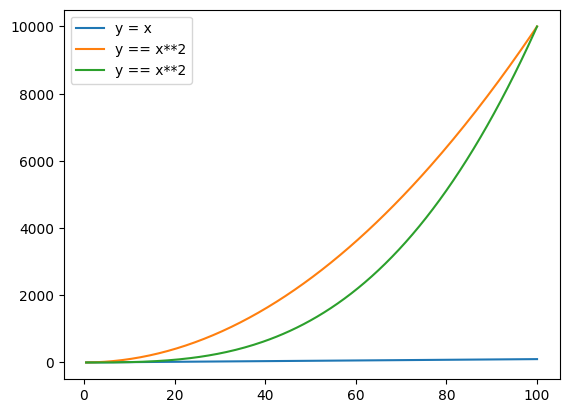

In [34]:
x = np.arange(0.5, 100.01, 0.5)
plt.plot(x, x, label = 'y = x')
plt.plot(x, x**2, label = 'y == x**2')
plt.plot(x, (x**3)/100, label = 'y == x**2')
plt.legend()
plt.show()

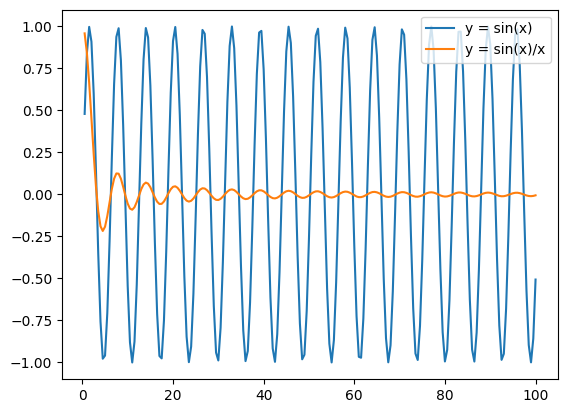

In [35]:
plt.plot(x, np.sin(x), label = 'y = sin(x)')
plt.plot(x, np.sin(x)/x, label = 'y = sin(x)/x')
plt.legend()
plt.show()

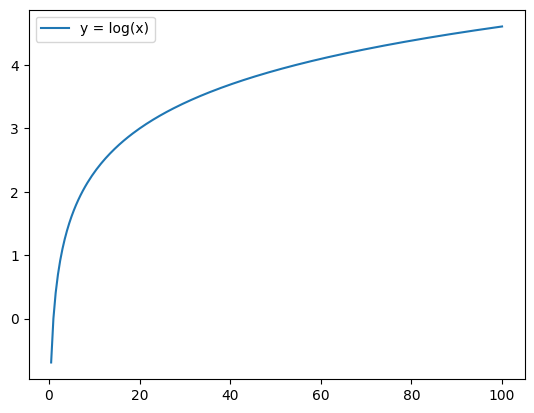

In [36]:
plt.plot(x, np.log(x), label = 'y = log(x)')
plt.legend()
plt.show()

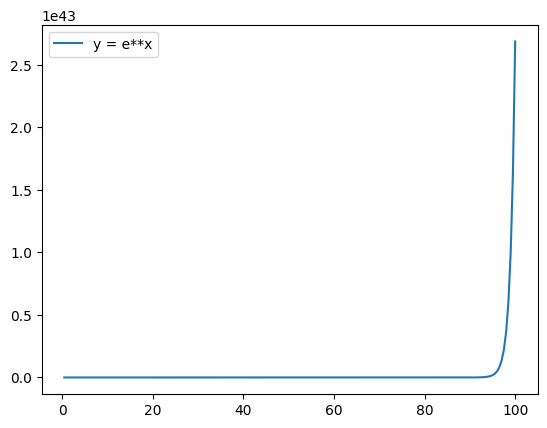

In [37]:
plt.plot(x, np.exp(x), label = 'y = e**x')
plt.legend()
plt.show()

### Question 10

In [40]:
# Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2.
arr = np.random.uniform(low = 1.0, high = 2.0, size = (20,5))
arr

array([[1.58426846, 1.75522575, 1.5267639 , 1.06391298, 1.50824216],
       [1.23643007, 1.56288456, 1.33783941, 1.15049949, 1.76889981],
       [1.21868272, 1.12500763, 1.86083852, 1.59893949, 1.12398789],
       [1.16078658, 1.0285682 , 1.03232126, 1.46136172, 1.92373272],
       [1.94917733, 1.07915292, 1.63778381, 1.91537933, 1.65156968],
       [1.1850879 , 1.34930878, 1.2494163 , 1.47364322, 1.24513562],
       [1.04666643, 1.22132937, 1.27052023, 1.54069463, 1.10423681],
       [1.26734655, 1.46280061, 1.67532901, 1.00317341, 1.79620471],
       [1.04679435, 1.39636516, 1.23712914, 1.26958959, 1.45486466],
       [1.18780326, 1.10109536, 1.42120144, 1.51688207, 1.60182353],
       [1.00811185, 1.86733648, 1.99083306, 1.75829417, 1.38055897],
       [1.27552542, 1.42053464, 1.33883816, 1.04949039, 1.6037119 ],
       [1.80085025, 1.54075558, 1.15281974, 1.89161718, 1.52729654],
       [1.92572435, 1.13605568, 1.61834186, 1.93024415, 1.72145613],
       [1.88531513, 1.24982994, 1.

In [41]:
# Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. 
df = pd.DataFrame(arr)
df.columns = ['a', 'b', 'c', 'd', 'e']
df

,a,b,c,d,e
0,1.584268,1.755226,1.526764,1.063913,1.508242
1,1.236430,1.562885,1.337839,1.150499,1.768900
2,1.218683,1.125008,1.860839,1.598939,1.123988
3,1.160787,1.028568,1.032321,1.461362,1.923733
4,1.949177,1.079153,1.637784,1.915379,1.651570
5,1.185088,1.349309,1.249416,1.473643,1.245136
6,1.046666,1.221329,1.270520,1.540695,1.104237
7,1.267347,1.462801,1.675329,1.003173,1.796205
8,1.046794,1.396365,1.237129,1.269590,1.454865
9,1.187803,1.101095,1.421201,1.516882,1.601824


In [42]:
# Find the column with the highest standard deviation. Find the row with the lowest mean.
df.mean()

a    1.365328
b    1.385817
c    1.512594
d    1.431162
e    1.475628
dtype: float64

The columns 'c' has the lowest mean out of all the columns

### Question 11

In [43]:
# Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. 
df['f'] = np.sum(arr, axis = 1)
df

,a,b,c,d,e,f
0,1.584268,1.755226,1.526764,1.063913,1.508242,7.438413
1,1.236430,1.562885,1.337839,1.150499,1.768900,7.056553
2,1.218683,1.125008,1.860839,1.598939,1.123988,6.927456
3,1.160787,1.028568,1.032321,1.461362,1.923733,6.606770
4,1.949177,1.079153,1.637784,1.915379,1.651570,8.233063
5,1.185088,1.349309,1.249416,1.473643,1.245136,6.502592
6,1.046666,1.221329,1.270520,1.540695,1.104237,6.183447
7,1.267347,1.462801,1.675329,1.003173,1.796205,7.204854
8,1.046794,1.396365,1.237129,1.269590,1.454865,6.404743
9,1.187803,1.101095,1.421201,1.516882,1.601824,6.828806


In [44]:
# Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. 
comp_array = np.array(df['f'] < 8).astype('int')
comp_array = list(comp_array)
for i in range(len(comp_array)):
    if comp_array[i] == 1:
        comp_array[i] = 'LT8'
    else:
        comp_array[i] = 'GT8'
comp_array

df['g'] = comp_array
df

,a,b,c,d,e,f,g
0,1.584268,1.755226,1.526764,1.063913,1.508242,7.438413,LT8
1,1.236430,1.562885,1.337839,1.150499,1.768900,7.056553,LT8
2,1.218683,1.125008,1.860839,1.598939,1.123988,6.927456,LT8
3,1.160787,1.028568,1.032321,1.461362,1.923733,6.606770,LT8
4,1.949177,1.079153,1.637784,1.915379,1.651570,8.233063,GT8
5,1.185088,1.349309,1.249416,1.473643,1.245136,6.502592,LT8
6,1.046666,1.221329,1.270520,1.540695,1.104237,6.183447,LT8
7,1.267347,1.462801,1.675329,1.003173,1.796205,7.204854,LT8
8,1.046794,1.396365,1.237129,1.269590,1.454865,6.404743,LT8
9,1.187803,1.101095,1.421201,1.516882,1.601824,6.828806,LT8


In [45]:
# Find the number of rows in the dataframe where the value in the column “g” is “LT8”. 
print(f'The number of rows in df that have value LT8 in the column g is {np.sum(df['g'] == 'LT8')}')

The number of rows in df that have value LT8 in the column g is 17


In [46]:
# Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

# LT8
print('The standard deviation for LT8 case is:')
print(np.std(df['f'][df['g'] == 'LT8']))

# GT8
print('The standard deviation for GT8 case is:')
print(np.std(df['f'][df['g'] == 'GT8']))

The standard deviation for LT8 case is:
0.56599122701749
The standard deviation for GT8 case is:
0.13680058013643556


### Question 12

In [47]:
a = 2
b = np.array([[11, 12, 13, 15], [11, 12, 13, 15]])
print(b.shape)

print(a * b)

(2, 4)
[[22 24 26 30]
 [22 24 26 30]]


In [48]:
a_broadcasted = np.array([[2, 2, 2, 2], [2, 2, 2, 2]])
print(a_broadcasted)

[[2 2 2 2]
 [2 2 2 2]]


As we saw, we were able to multiply a scalar to a vector, this is made possible by using numpy broadcasting. <br>
If possible, NumPy broadcasts the smaller vector (in our case the scaler) to the shape of b (a becomes a_broadcasted), <br>
and then these 2 vectors are used to perform operations (in our case, element-wise multiplication).

### Question 13

In [50]:
# I have considered that the we won't be specifying an axis, which means that we will flatten the array and then return index of the 
# minimum element in the flattened array 
def arg_minimize(arr):
    arr_flatten = list(arr.flatten())
    min_elem = float('inf')
    min_index = 0
    for i in range(len(arr_flatten)):
        if arr_flatten[i] < min_elem: 
            min_index = i
            min_elem = arr_flatten[i]
    return min_index

In [51]:
arr = np.array([[11, 12, 13, 15], [1, 4, 8, 12]])
print(f'My function: {arg_minimize(arr)}')
print(f'np.argmin: {np.argmin(arr)}')

My function: 4
np.argmin: 4
